## **Data Exploration**

There are a total of 23 features in this dataset which are:

|Feature Name|Description|Data Type|
|-|-|-|
|<font color='green'>CLIENTNUM</font>|Unique identifier for the customer holding the account|
|<font color='green'>Attrition_Flag</font>|Internal event (customer activity) variable (Existing = 1, Attrited = 0)|<font color='red'>Categorical</font> [Output]|
|<font color='green'>Customer_Age</font>|Customer's Age in Years|<font color='red'>Numerical</font>|
|<font color='green'>Gender</font>|(M = Male, F = Female)|<font color='red'>Categorical</font>|
|<font color='green'>Dependent_Count</font>|Number of dependents|<font color='red'>Numerical</font>|
|<font color='green'>Education_Level</font>|Educational Qualification of the account holder (Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown)|<font color='red'>Categorical</font>|
|<font color='green'>Marital_Status</font>|(Married, Single, Divorced, Unknown)|<font color='red'>Categorical</font>|
|<font color='green'>Income_Category</font>|Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K)|<font color='red'>Categorical</font>|
|<font color='green'>Card_Category</font>|Type of Card (Blue, Silver, Gold, Platinum)</font>|<font color='red'>Categorical</font>|
|<font color='green'>Months_on_book</font>|Period of relationship with bank|<font color='red'>Numerical</font>|
|<font color='green'>Total_Relationship_Count</font>|Total no. of products held by the customer|<font color='red'>Numerical</font>|
|<font color='green'>Months_Inactive_12_mon</font>|No. of months inactive in the last 12 months|<font color='red'>Numerical</font>|
|<font color='green'>Contacts_Count_12_mon</font>|No. of Contacts in the last 12 months|<font color='red'>Numerical</font>|
|<font color='green'>Credit_Limit</font>|Credit Limit on the Credit Card|<font color='red'>Numerical</font>|
|<font color='green'>Total_Revolving_Bal</font>|Total Revolving Balance on the Credit Card|<font color='red'>Numerical</font>|
|<font color='green'>Avg_Open_To_Buy</font>|Open to Buy Credit Line (Average of last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Amt_Chng_Q4_Q1</font>|Change in Transaction Amount (Q4 over Q1)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Trans_Amt</font>|Total Transaction Amount (Last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Trans_Ct</font>|Total Transaction Count (Last 12 months)|<font color='red'>Numerical</font>|
|<font color='green'>Total_Ct_Chng_Q4_Q1</font>|Change in Transaction Count (Q4 over Q1)|<font color='red'>Numerical</font>|
|<font color='green'>Avg_Utilization_Ratio</font>|Average Card Utilization Ratio|<font color='red'>Numerical</font>|
|<font color='green'>Naive_Bayes_Classifier...</font>|Naive Bayes||
|<font color='green'>Naive_Bayes_Classifier...</font>|Naive Bayes||

### **Import Necessary Libraries**

In [368]:
from HW1def import *

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from imblearn.under_sampling import TomekLinks

# ignore warnings
warnings.filterwarnings('ignore')

### **Import Dataset**

In [369]:
dfOri = df = pd.read_csv('HWdata/credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [370]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [371]:
df.shape

(10127, 23)

We can see that this dataset has 23 features and 10127 data.

In [372]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [373]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

### **Drop Unnecessary Features**

Since '<font color='orange'>CLIENTNUM</font>' is a unique classifier for each customer, we will drop this feature.
The last 2 features, '<font color='orange'>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1</font>' and '<font color='orange'>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2</font>', are for Naive Bayes Classifier, which we won't be using in this assignment, we will also drop these features.


In [374]:
df.drop(
['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [375]:
df.shape

(10127, 20)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

After dropping the unnecessary features, we are left with 20 features.

In which, there are:

- 6 features that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 14 features that are '<font color='green'>int64</font>' and '<font color='green'>float64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [377]:
dfNum = df.select_dtypes(include=['int64', 'float64'])

**Separate Categorical Features from Dataset**

In [378]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,1:]

**Separate Output from Dataset**

In [379]:
dfOut = df.iloc[:,0:1]

**Concatenate Separated Data**

In [380]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer': 0})
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


### **Model Training w/o Data Preprocessing**

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#get the dummy variables for the categorical variables
dfbm = pd.get_dummies(df)

xbm = dfbm.drop(['Attrition_Flag'], axis = 1)
ybm = dfbm['Attrition_Flag']

xbm_train,xbm_test,ybm_train,ybm_test = train_test_split(xbm,ybm,test_size = 0.2,random_state = 0)

clfbm = LogisticRegression()
clfbm.fit(xbm_train,ybm_train)
print("model score: %.8f" % clfbm.score(xbm_test, ybm_test))

model score: 0.89338598


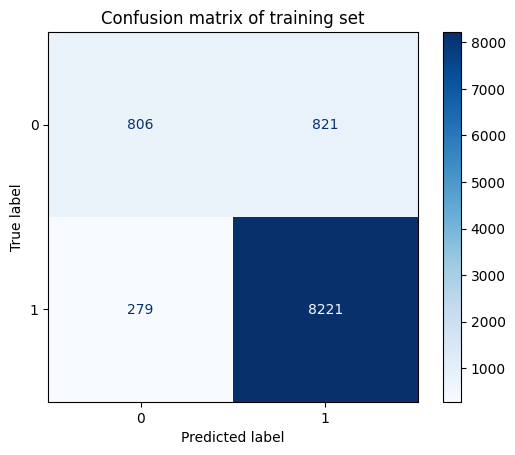

In [382]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clfbm,
                      xbm,
                      ybm,
                      display_labels=list(set(ybm_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [383]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
ybm_pred_train = clfbm.predict(xbm_train)
print("Classification report on Train data\n=======================")
print(classification_report(y_true=ybm_train, y_pred=ybm_pred_train))
print("Confusion matrix on Train data\n=======================")

print(confusion_matrix(y_true=ybm_train, y_pred=ybm_pred_train))

Classification report on Train data
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      1318
           1       0.91      0.97      0.94      6783

    accuracy                           0.89      8101
   macro avg       0.83      0.73      0.77      8101
weighted avg       0.88      0.89      0.88      8101

Confusion matrix on Train data
[[ 654  664]
 [ 220 6563]]


In [384]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
ybm_pred_test = clfbm.predict(xbm_test)
print("Classification report on Test data\n=======================")
print(classification_report(y_true=ybm_test, y_pred=ybm_pred_test))
print("Confusion matrix on Test data\n=======================")

print(confusion_matrix(y_true=ybm_test, y_pred=ybm_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.72      0.49      0.58       309
           1       0.91      0.97      0.94      1717

    accuracy                           0.89      2026
   macro avg       0.82      0.73      0.76      2026
weighted avg       0.88      0.89      0.88      2026

Confusion matrix on Test data
[[ 152  157]
 [  59 1658]]


### **Check Values of Numerical Features**

In [385]:
df.isnull().sum()

Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Attrition_Flag              0
dtype: int64

In [386]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

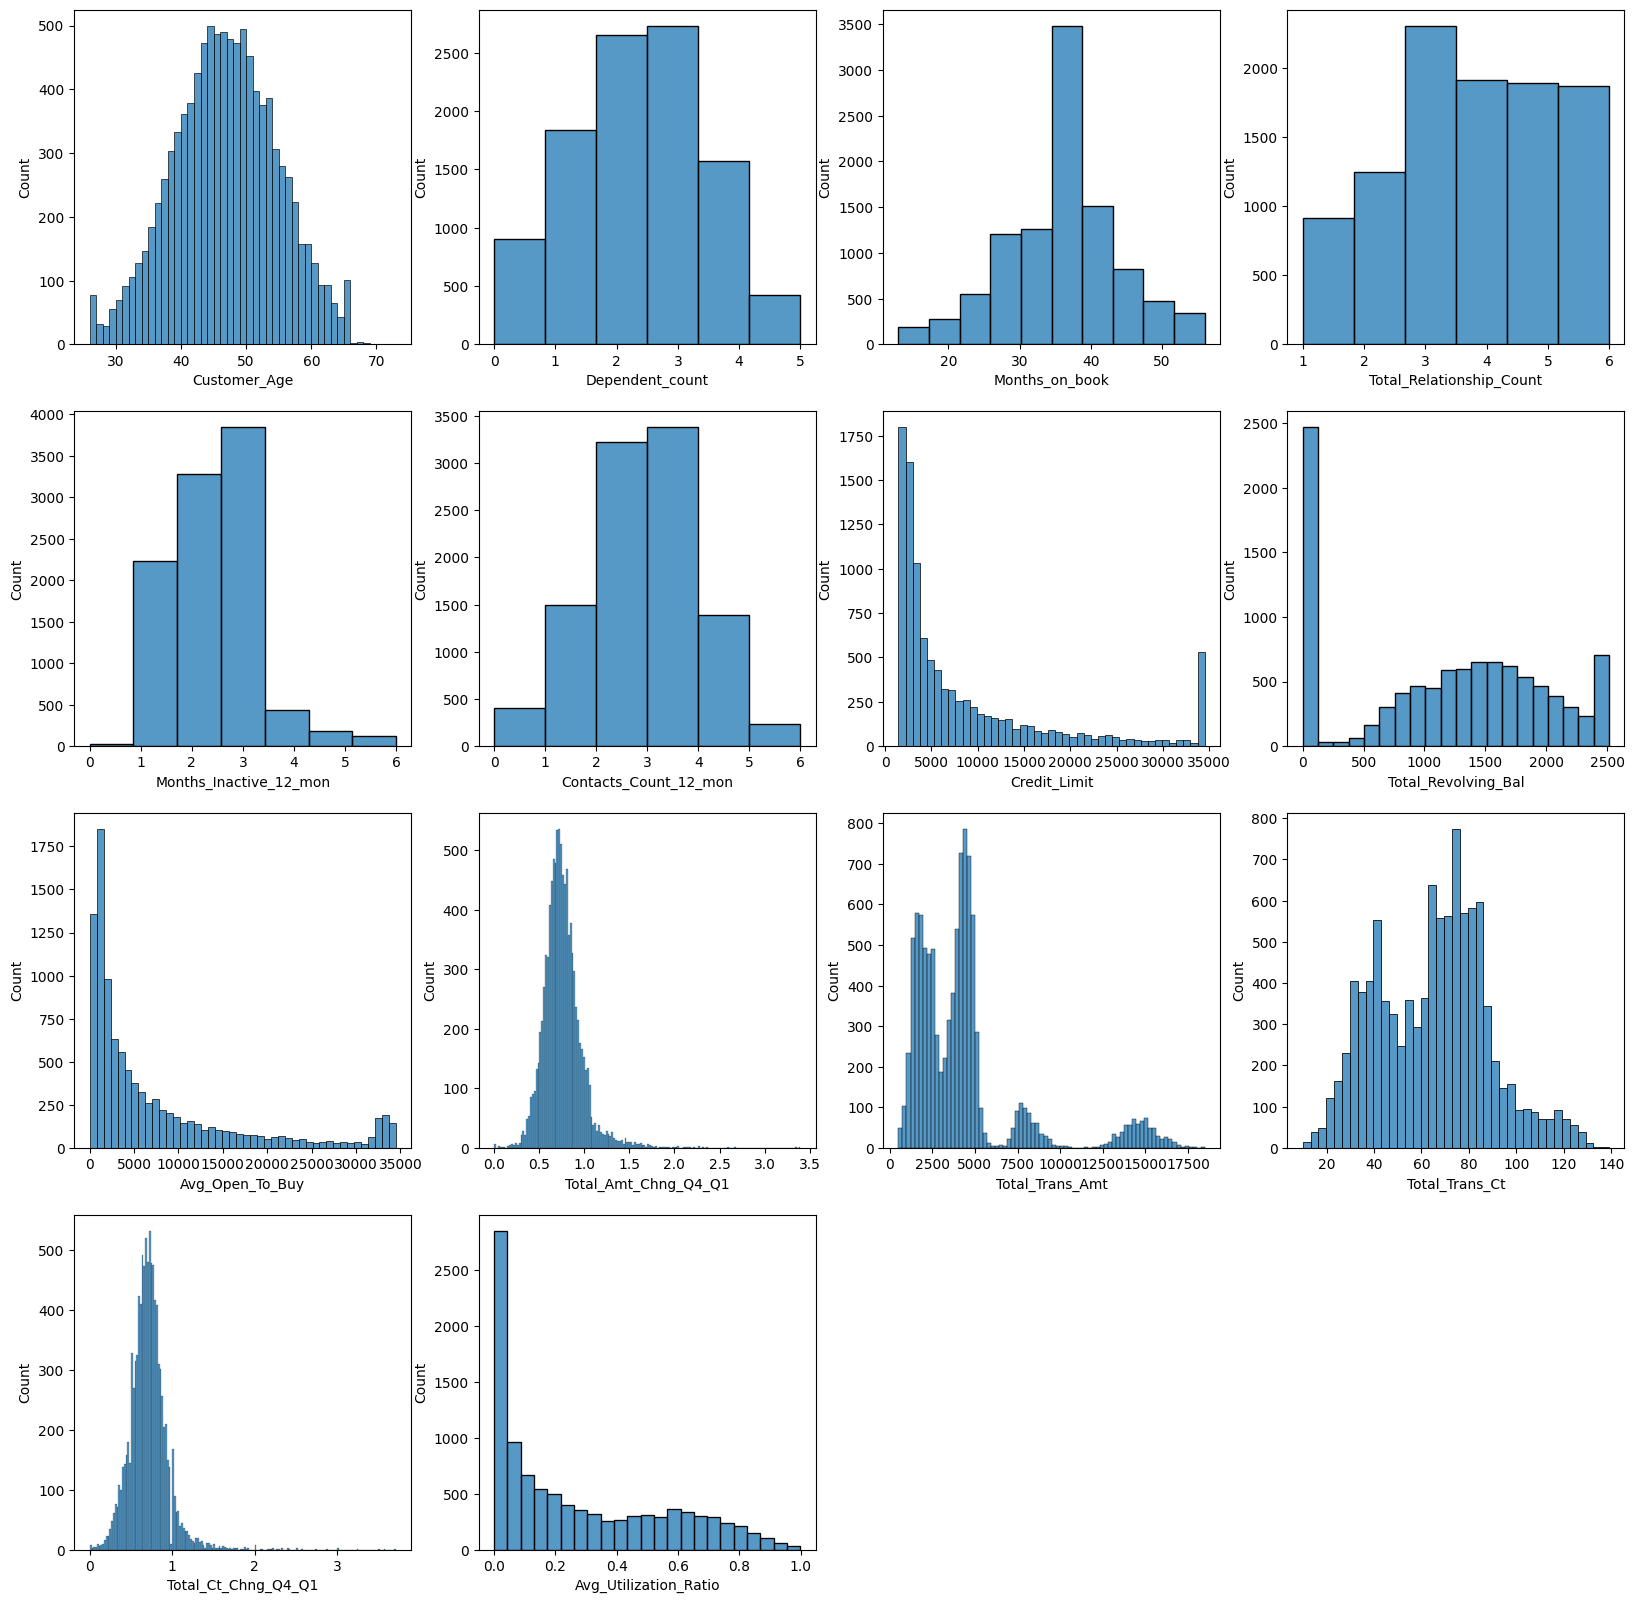

In [387]:
# plot numerical data
plt.figure(figsize=(20,20))
plt.subplot(441) 
sns.histplot(df['Customer_Age'])
plt.subplot(442) 
sns.histplot(df['Dependent_count'],bins=6)
plt.subplot(443) 
sns.histplot(df['Months_on_book'],bins=10)
plt.subplot(444) 
sns.histplot(df['Total_Relationship_Count'],bins=6)
plt.subplot(445) 
sns.histplot(df['Months_Inactive_12_mon'],bins=7)
plt.subplot(446) 
sns.histplot(df['Contacts_Count_12_mon'],bins=6)
plt.subplot(447) 
sns.histplot(df['Credit_Limit'])
plt.subplot(448) 
sns.histplot(df['Total_Revolving_Bal'])
plt.subplot(449) 
sns.histplot(df['Avg_Open_To_Buy'])
plt.subplot(4,4,10) 
sns.histplot(df['Total_Amt_Chng_Q4_Q1'])
plt.subplot(4,4,11)
sns.histplot(df['Total_Trans_Amt'])
plt.subplot(4,4,12)
sns.histplot(df['Total_Trans_Ct'])
plt.subplot(4,4,13)
sns.histplot(df['Total_Ct_Chng_Q4_Q1'])
plt.subplot(4,4,14)
sns.histplot(df['Avg_Utilization_Ratio'])

What we got from plotting values of numerical features:

|Feature Names|Normally Distributed|
|-|-|
|Customer_Age|Yes|
|Dependent_Count|Yes|
|Months_on_book|Yes|
|Total_Relationship_Count|No|
|Months_Inactive_12_mon|Almost|
|Contacts_Count_12_mon|Yes|
|Credit_Limit|No|
|Total_Revolving_Bal|No|
|Avg_Open_To_Buy|No|
|Total_Amt_Chng_Q4_Q1|Almost|
|Total_Trans_Amt|No|
|Total_Trans_Ct|Almost|
|Total_Ct_Chng_Q4_Q1|Almost|
|Avg_Utilization_Ratio|No|

### **Check Values of Categorical Features**

In [388]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [389]:
# Calculate Percentage of Gender
100*df['Gender'].value_counts()/len(df)

F    52.908068
M    47.091932
Name: Gender, dtype: float64

In [390]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [391]:
# Calculate Percentage of Education Level
100*df['Education_Level'].value_counts()/len(df)

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [392]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [393]:
# Calculate Percentage of Marital Status
100*df['Marital_Status'].value_counts()/len(df)

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

In [394]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [395]:
# Calculate Percentage of Income Category
100*df['Income_Category'].value_counts()/len(df)

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

In [396]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [397]:
# Calculate Percentage of Card Category
100*df['Card_Category'].value_counts()/len(df)

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

<AxesSubplot:title={'center':'Card Category'}>

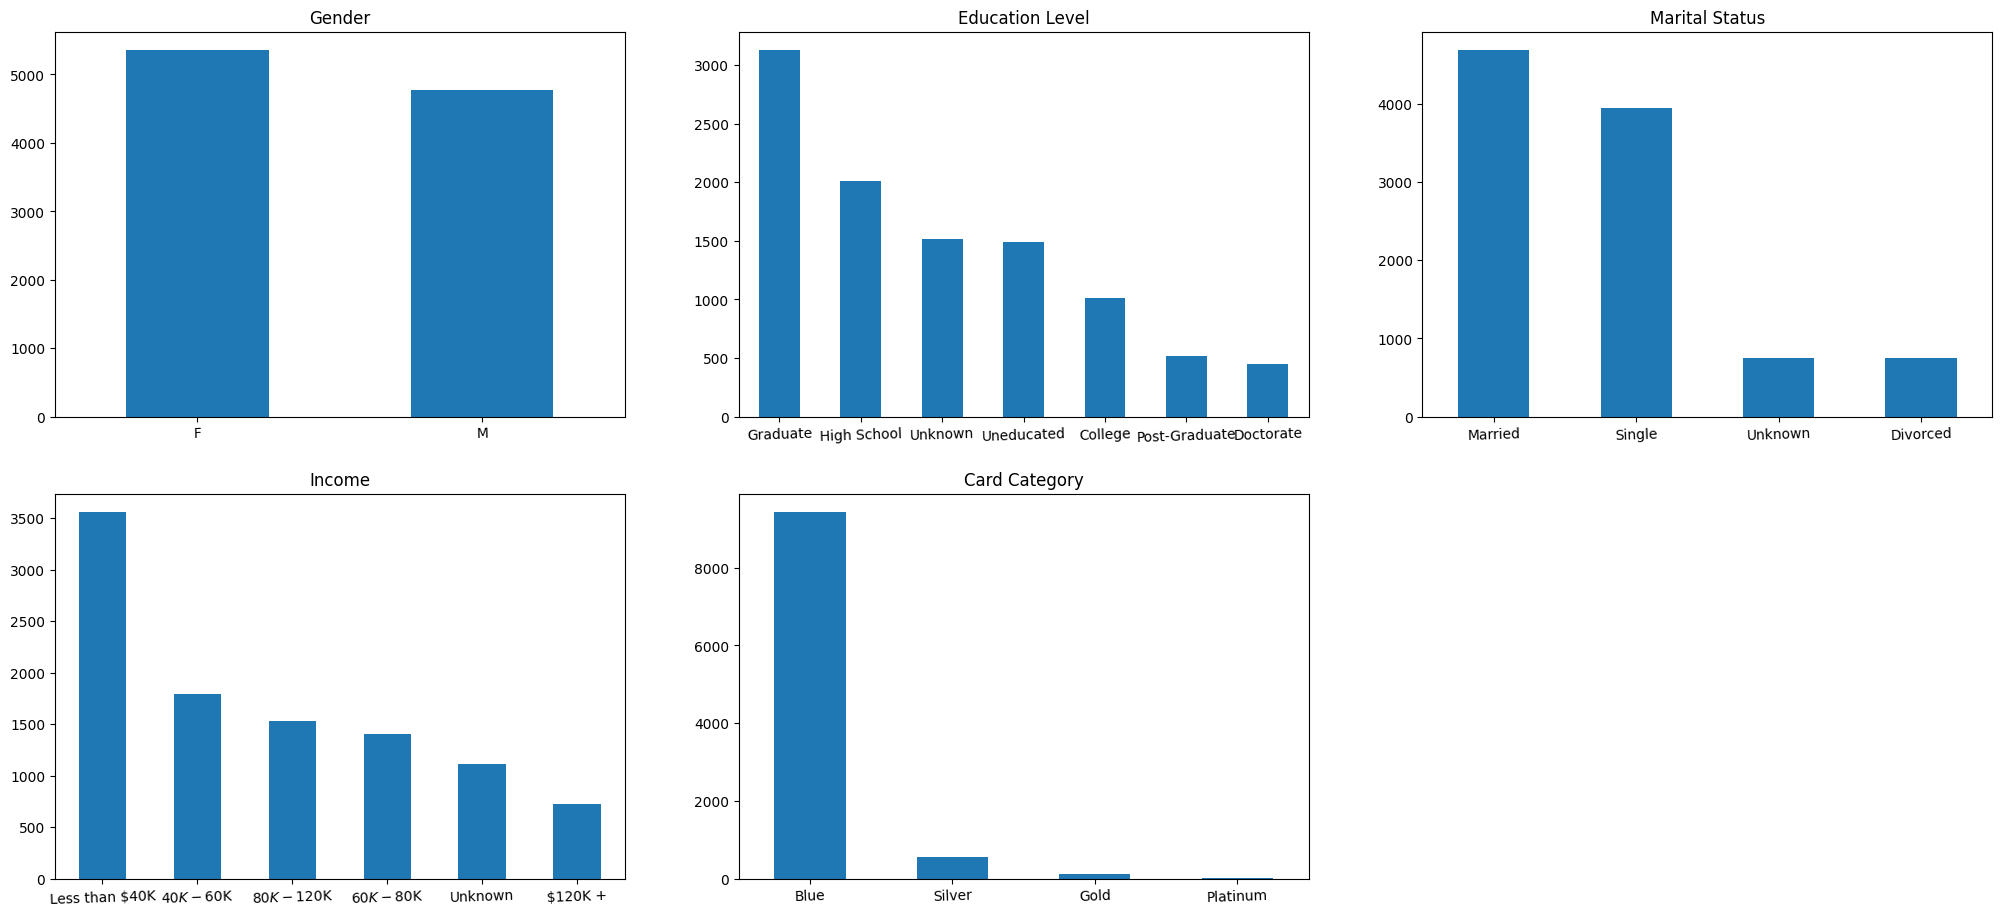

In [398]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
df['Gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
df['Education_Level'].value_counts(normalize=False).plot.bar(title= 'Education Level',rot=2) 
plt.subplot(233) 
df['Marital_Status'].value_counts(normalize=False).plot.bar(title= 'Marital Status',rot=2)
plt.subplot(234) 
df['Income_Category'].value_counts(normalize=False).plot.bar(title= 'Income',rot=2)
plt.subplot(235) 
df['Card_Category'].value_counts(normalize=False).plot.bar(title= 'Card Category',rot=2)

What we got from plotting values of categorical features:

|Feature Names|What we got|
|-|-|
|Gender|There are nearly the same amount of male and female.|
|Education_Level|Most of the people in this dataset are 'Graduate' and around 15% of the people are 'Unknown'|
|Marital_Status|46% of this data are 'Married', 39% are 'Single' and the rest are 'Unknown' or 'Divorced'|
|Income_Category|Most people in this dataset have 'less than 40K' income|
|Card_Category|People in this dataset mostly hold blue cards (more than 93%) and the rest hold the other 3 cards (less than 7%).|

### **Check Behaviour of Attrition_Flag**

In [399]:
dfAtt = df[df['Attrition_Flag'] == 0]
dfAtt

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
21,62,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,F,Graduate,Married,Less than $40K,Blue,0
39,66,0,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,F,Doctorate,Married,Unknown,Blue,0
51,54,1,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,F,Graduate,Married,Less than $40K,Blue,0
54,56,2,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,M,Graduate,Married,$120K +,Blue,0
61,48,2,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,M,Graduate,Married,$60K - $80K,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,55,3,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,F,Uneducated,Single,Unknown,Blue,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


In [400]:
dfExist = df[df['Attrition_Flag'] == 1]
dfExist

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,46,5,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,M,College,Single,$80K - $120K,Blue,1
10117,57,2,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,M,Graduate,Married,$80K - $120K,Blue,1
10120,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,M,High School,Single,$60K - $80K,Blue,1
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,F,Graduate,Single,Less than $40K,Blue,1


### **Plot Features of Attrited Customers**

<AxesSubplot:title={'center':'Card Category'}>

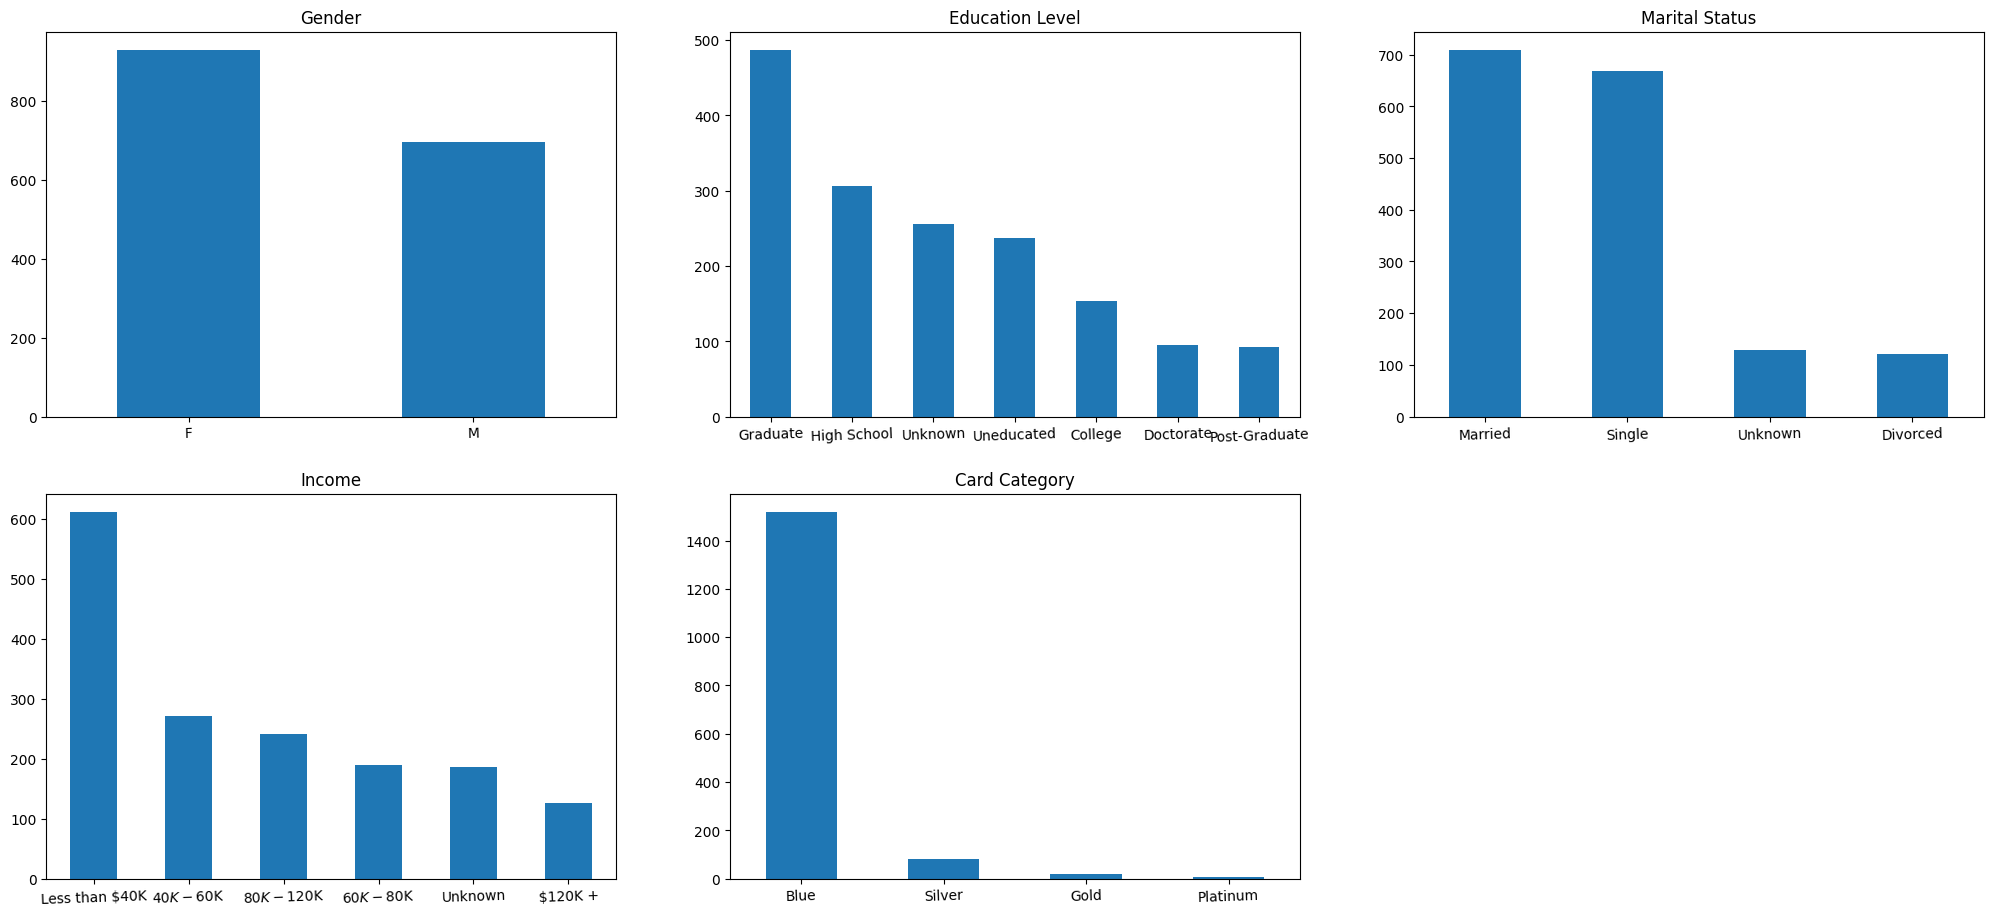

In [401]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
dfAtt['Gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
dfAtt['Education_Level'].value_counts(normalize=False).plot.bar(title= 'Education Level',rot=2) 
plt.subplot(233) 
dfAtt['Marital_Status'].value_counts(normalize=False).plot.bar(title= 'Marital Status',rot=2)
plt.subplot(234) 
dfAtt['Income_Category'].value_counts(normalize=False).plot.bar(title= 'Income',rot=2)
plt.subplot(235) 
dfAtt['Card_Category'].value_counts(normalize=False).plot.bar(title= 'Card Category',rot=2)

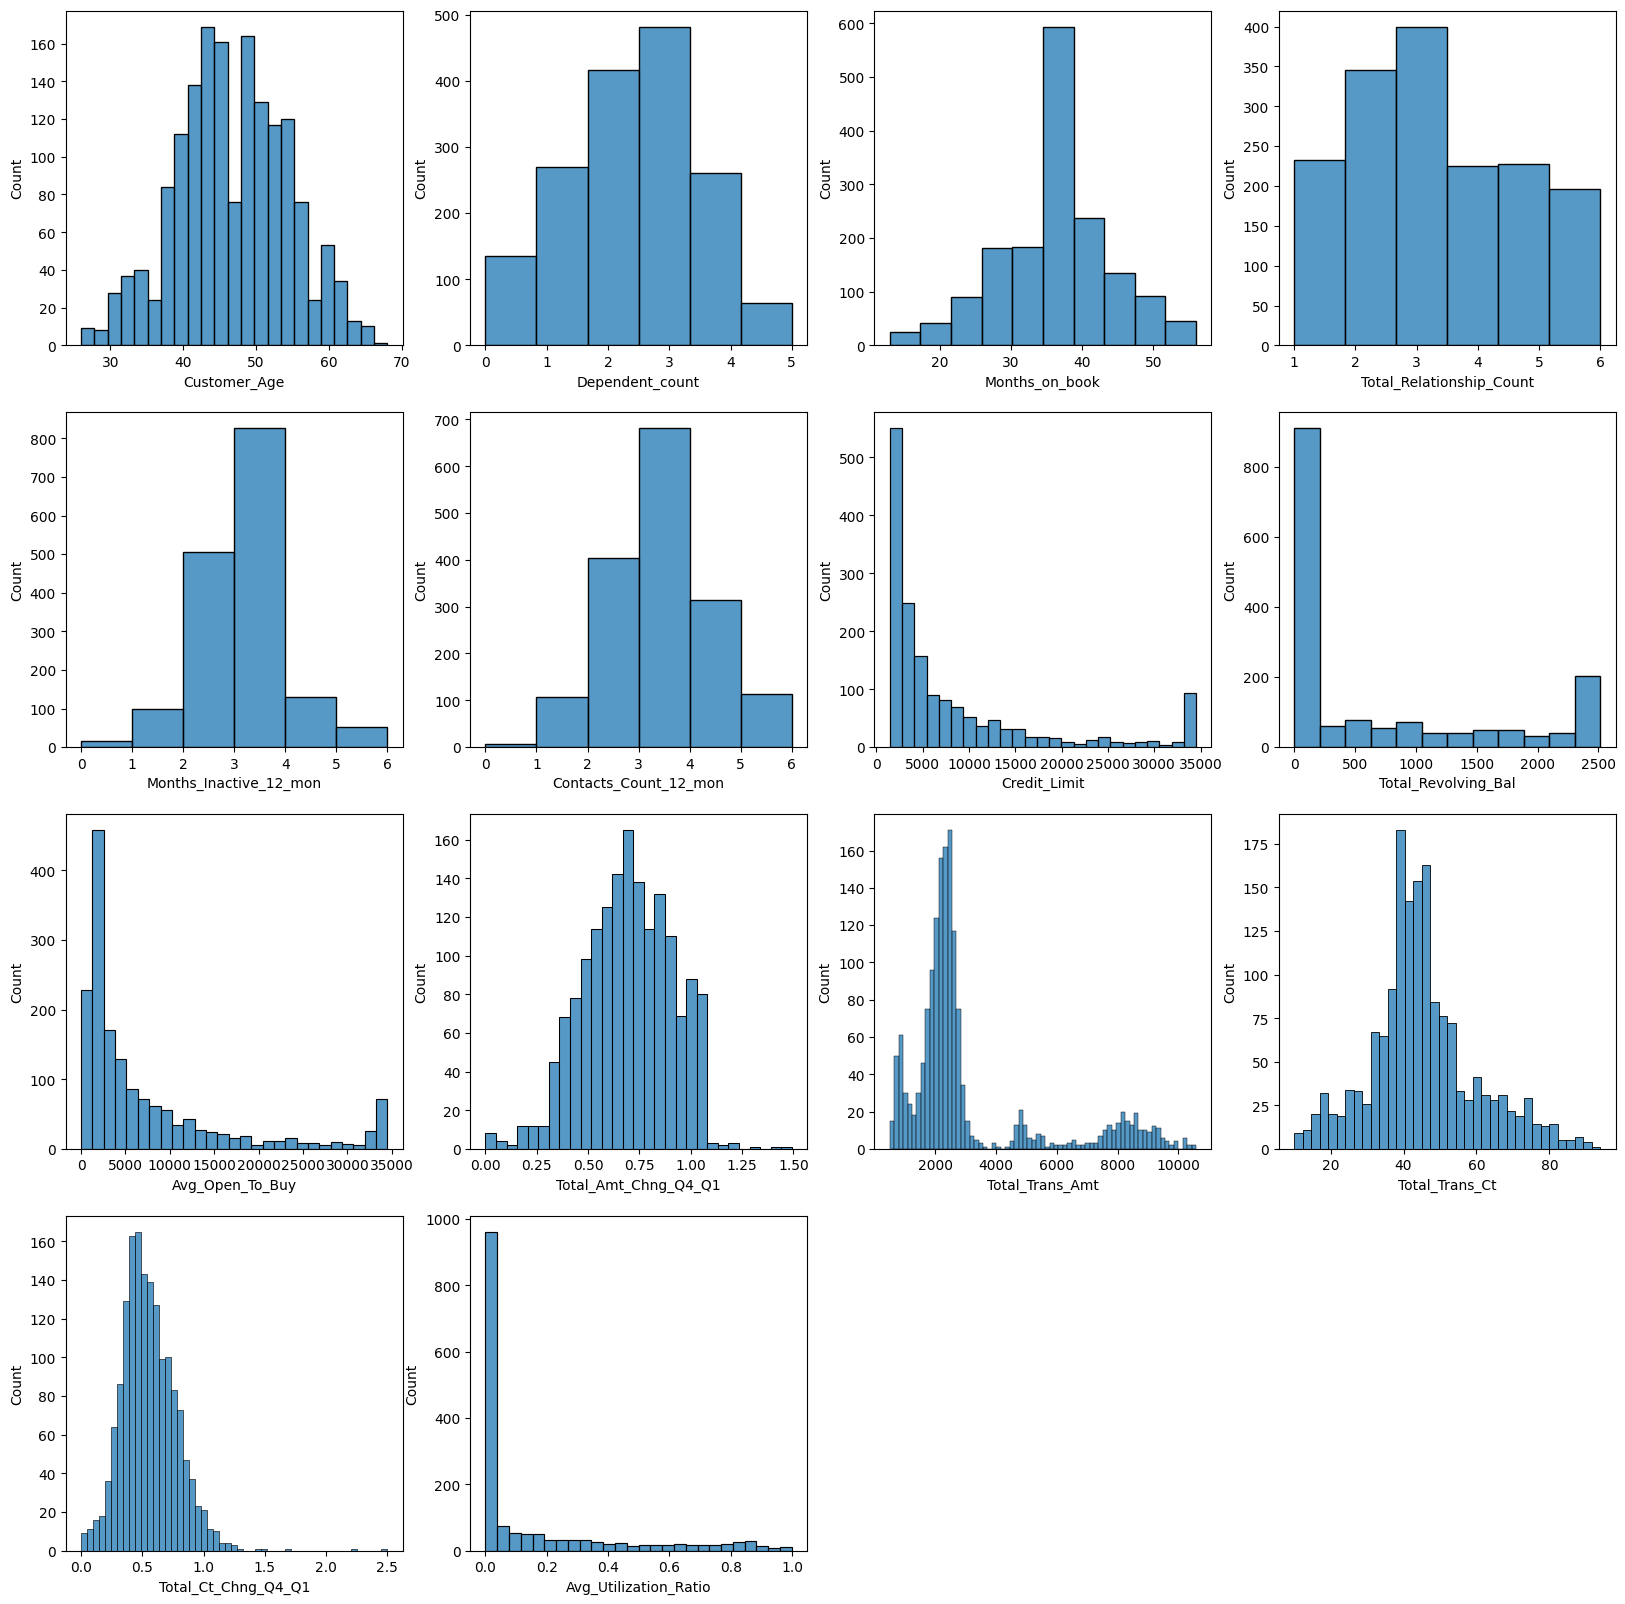

In [402]:
# plot numerical data
plt.figure(figsize=(20,20))

for idx, col in enumerate(dfNum.columns):
    if col not in ['Attrition_Flag']:
        plt.subplot(4,4,idx+1)
        if col in ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']:
            sns.histplot(dfAtt[col],bins=6)
        elif col in ['Months_on_book']:
            sns.histplot(dfAtt[col],bins=10)
        else:
            sns.histplot(dfAtt[col])

### **Plot Features of Existing Customers**

<AxesSubplot:title={'center':'Card Category'}>

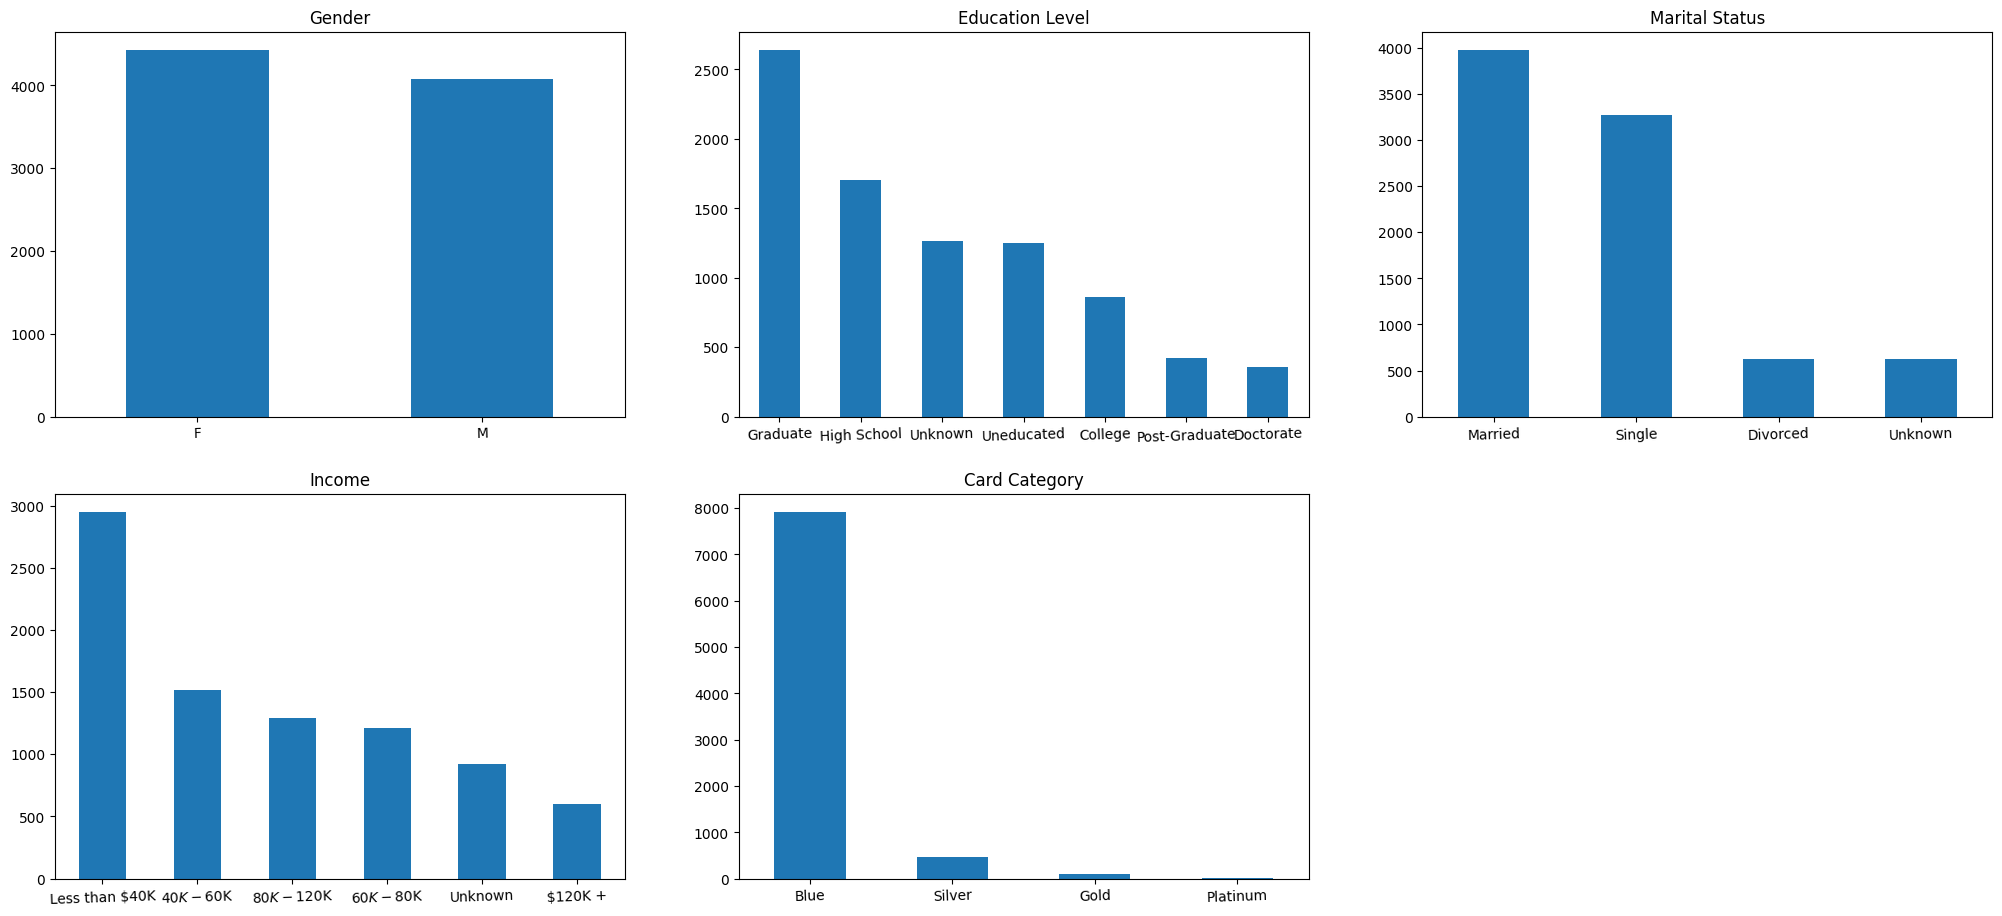

In [403]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
dfExist['Gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
dfExist['Education_Level'].value_counts(normalize=False).plot.bar(title= 'Education Level',rot=2) 
plt.subplot(233) 
dfExist['Marital_Status'].value_counts(normalize=False).plot.bar(title= 'Marital Status',rot=2)
plt.subplot(234) 
dfExist['Income_Category'].value_counts(normalize=False).plot.bar(title= 'Income',rot=2)
plt.subplot(235) 
dfExist['Card_Category'].value_counts(normalize=False).plot.bar(title= 'Card Category',rot=2)

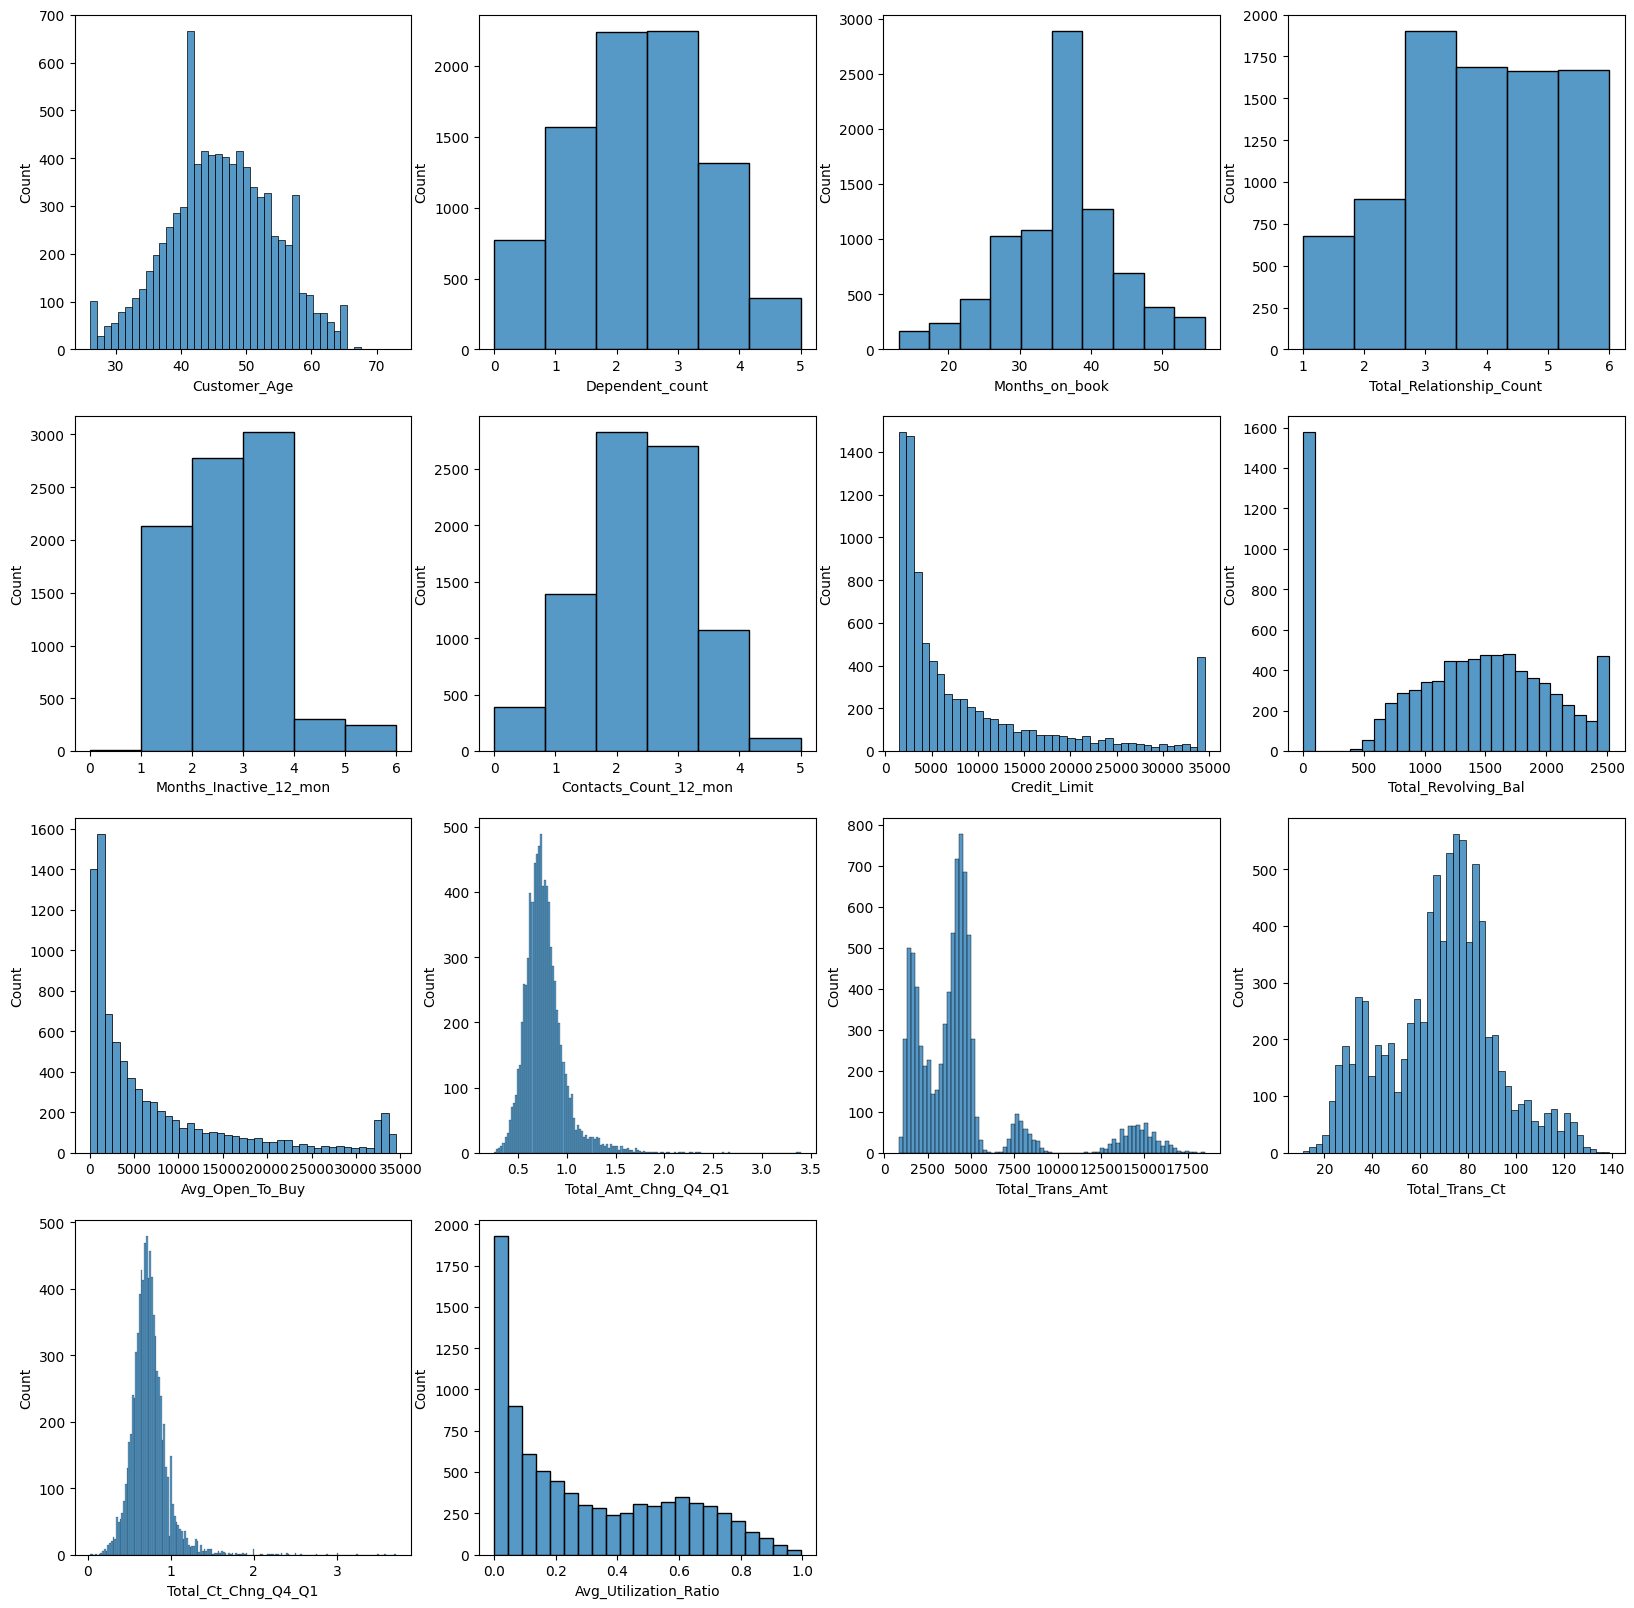

In [404]:
# plot numerical data
plt.figure(figsize=(20,20))

for idx, col in enumerate(dfNum.columns):
    if col not in ['Attrition_Flag']:
        plt.subplot(4,4,idx+1)
        if col in ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']:
            sns.histplot(dfExist[col],bins=6)
        elif col in ['Months_on_book']:
            sns.histplot(dfExist[col],bins=10)
        else:
            sns.histplot(dfExist[col])

### **Pairplot Interesting Features**

In [405]:
# sns.pairplot(df[['Attrition_Flag','Total_Relationship_Count', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio']], diag_kind="hist", hue="Attrition_Flag")

Good and Bad things of this dataset:

|Good Things|Explanation|
|-|-|
|Data Distribution|Most Numerical data are normally distributed.|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

<hr>

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation, eg. Avg_Open_To_Buy.|
|'Card_Category' Features|This feature's data are mostly 'Blue' (around 93%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high, which means that data variation is very bad.|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a credit card dataset, which can be considered as a dataset provided by a bank, those 'Unknown' data might be undisclosed information of the customers.

### **Check Correlation between Numerical Features**

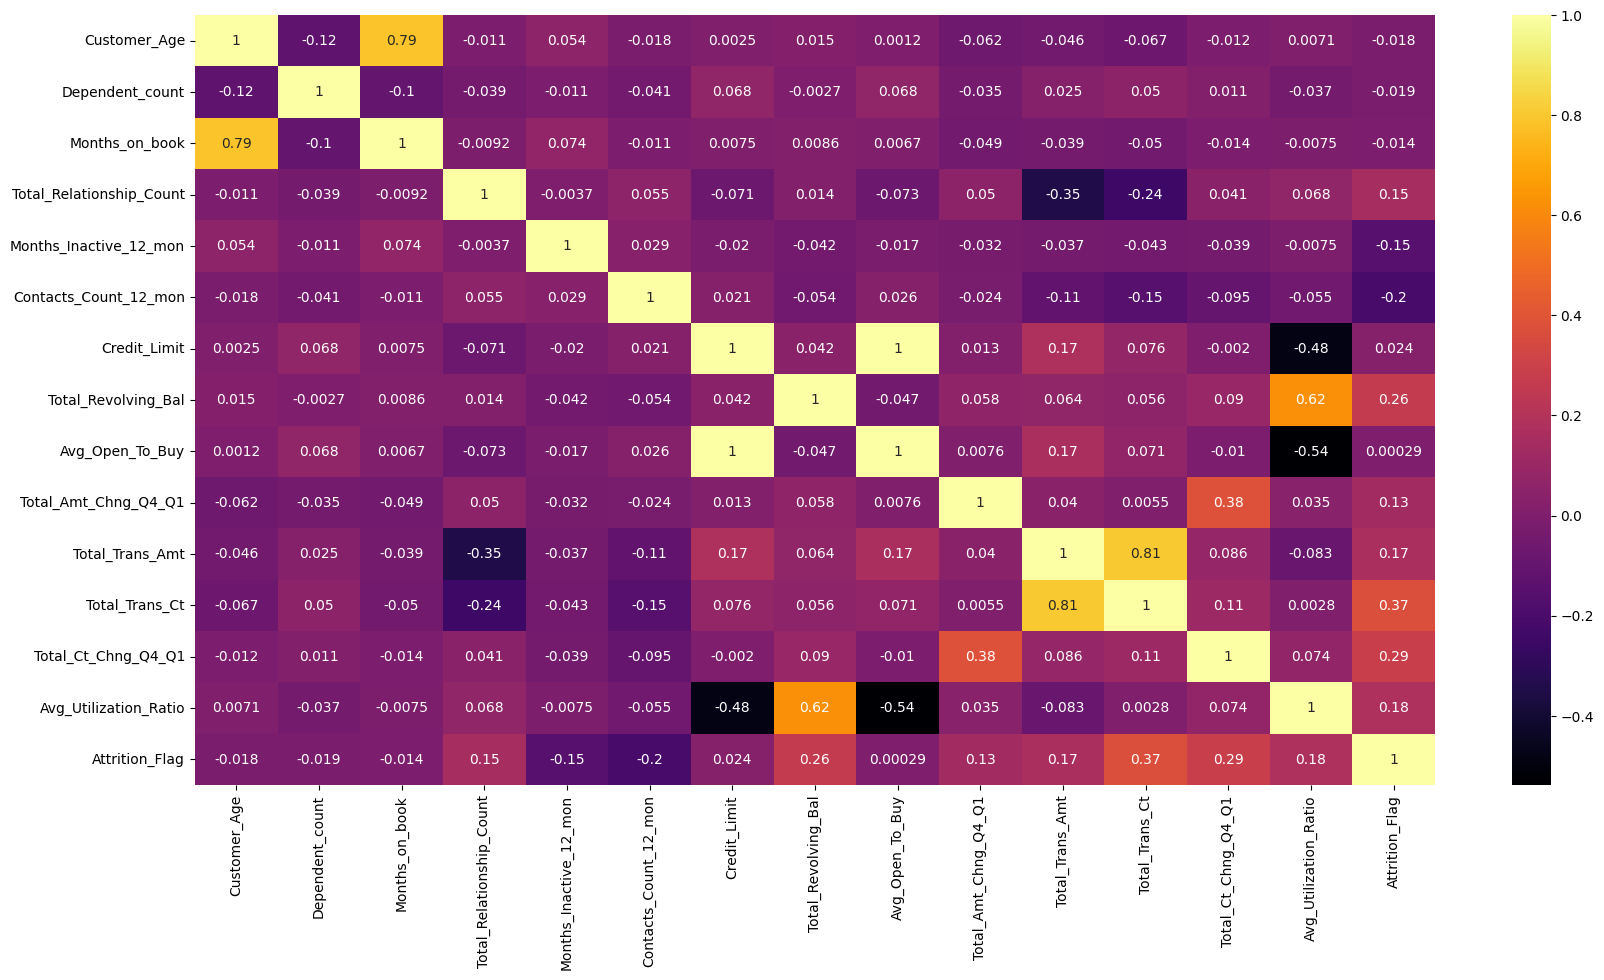

In [406]:
checkCorrFF(df)

From the heatmap above, we can drop these features:

|Feature Names|Reasons|
|-|-|
|Customer_Age|Looking at the heatmap, it correlates with 'Months_on_Book' (79%). We assumed that 'Months_on_Book' is more useful than 'Customer_Age'.|
|Credit_Limit|Looking at the heatmap, 'Credit_Limit' and 'Avg_Open_To_Buy' perfectly correlate to each other.|
|Total_Trans_Amt|Looking at the heatmap, it correlates with 'Total_Trans_Ct' (81%) and correlates with other features quite a lot.|
|Total_Amt_Chng_Q4_Q1|Looking at the heatmap, it correlates with 'Total_Ct_Chng_Q4_Q1' (38%).|
|Avg_Utilization_Ratio|Looking at the heatmap, it correlates too much with 3 features, 'Credit_Limit', 'Total_Revolving_Bal' and 'Avg_Open_To_Buy'.|

### **Drop High Correlation Features**

In [407]:
# df.drop(['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], 
#         axis=1, inplace=True)

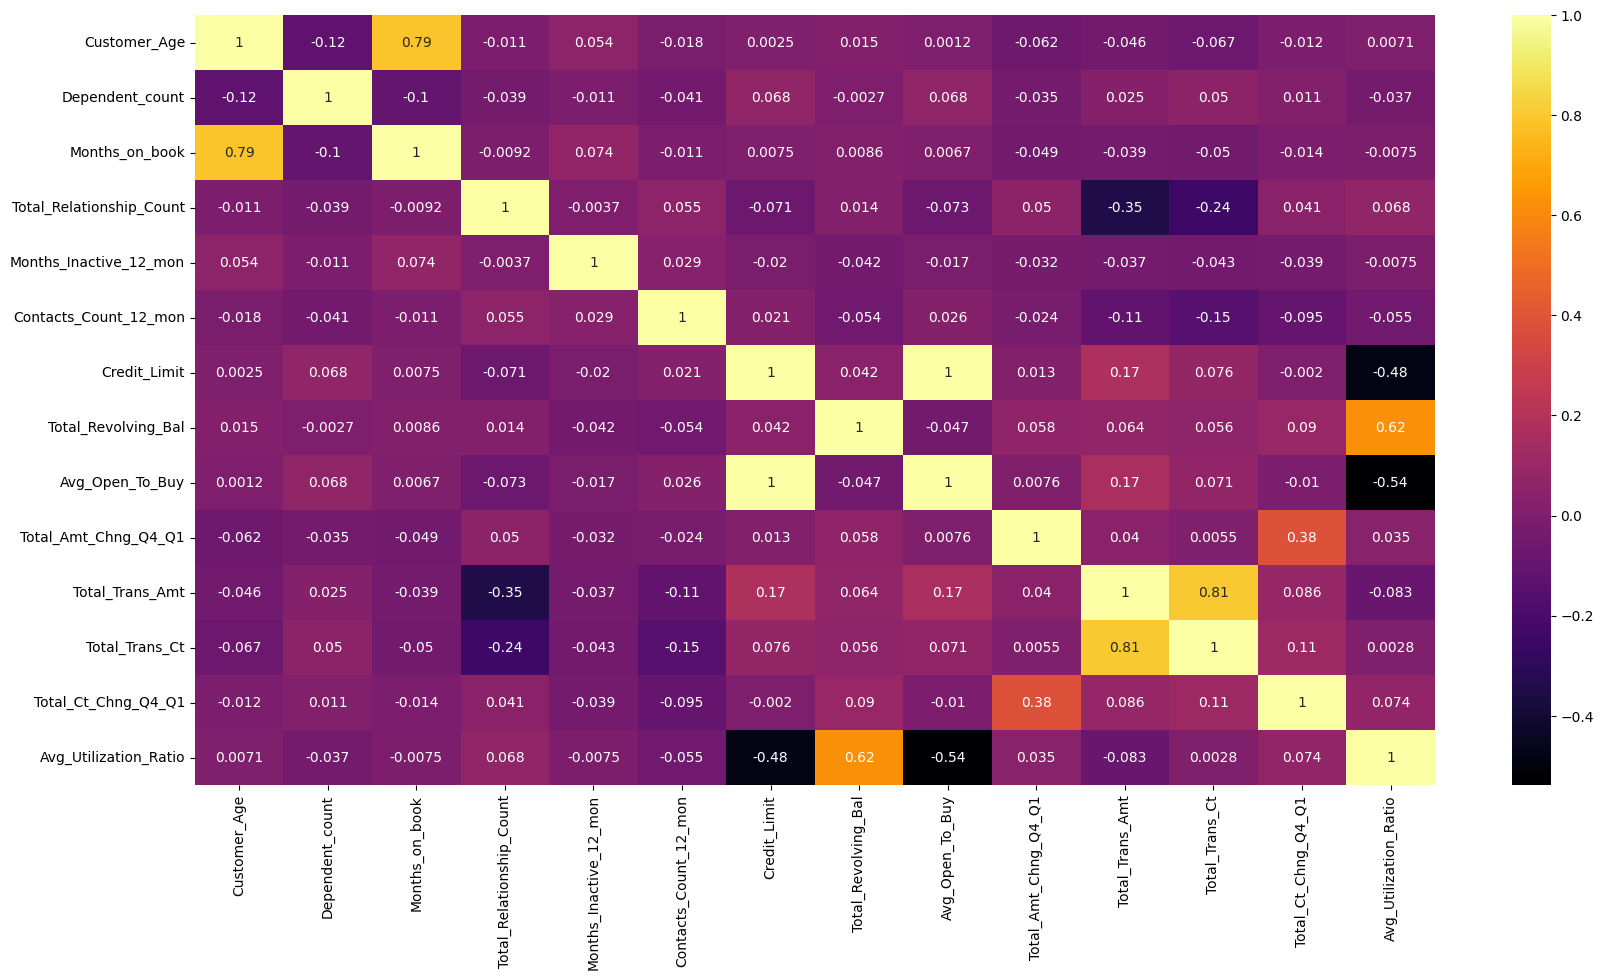

In [408]:
checkCorrFF(df.iloc[:,:-1])

### **Label Encoder and use Tomek**

In [409]:
df_LE = df.copy()
le_Gender = LabelEncoder()
le_Education_Level = LabelEncoder()
le_Marital_Status = LabelEncoder()
le_Income_Category = LabelEncoder()
le_Card_Category = LabelEncoder()

df_LE['Gender'] = le_Gender.fit_transform(df_LE['Gender'])
df_LE['Education_Level'] = le_Gender.fit_transform(df_LE['Education_Level'])
df_LE['Marital_Status'] = le_Gender.fit_transform(df_LE['Marital_Status'])
df_LE['Income_Category'] = le_Gender.fit_transform(df_LE['Income_Category'])
df_LE['Card_Category'] = le_Gender.fit_transform(df_LE['Card_Category'])
df_LE

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,3,1,2,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2,2,4,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,2,1,3,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,3,3,4,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,5,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,2,2,1,0,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,6,0,1,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,3,1,4,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,2,3,1,0,0


### **Tomek Links**

<AxesSubplot:ylabel='Type'>

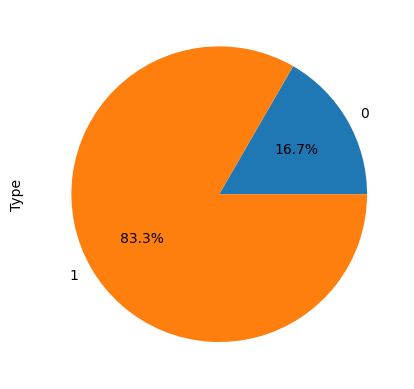

In [410]:
undersample = TomekLinks()

# transform the dataset
dfX = df_LE.drop(['Attrition_Flag'], axis=1)
dfY = df_LE['Attrition_Flag']
X, y = undersample.fit_resample(dfX, dfY)
dfTomek = pd.concat([X, y], axis=1)

dfTomek.groupby('Attrition_Flag').size().plot(kind='pie',
                                        y = "Attrition_Flag",
                                        label = "Type",
                                        autopct='%1.1f%%')

## **Data Preprocessing**
### **Feature Scaling (Numerical)**

In [411]:
min_max_scaler = MinMaxScaler()

for idx in dfTomek.columns:
    if idx not in ['Attrition_Flag']:
        dfTomek[idx]=min_max_scaler.fit_transform(dfTomek[idx].values.reshape(-1,1))

In [412]:
dfTomek.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
count,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000
mean,0.434553,0.470627,0.534958,0.559463,0.391131,0.408695,0.216019,0.464965,0.214713,0.223043,0.219645,0.428295,0.199061,0.277470,0.466510,0.516182,0.488393,0.573781,0.059538,0.833367
std,0.169018,0.259597,0.184337,0.311123,0.168220,0.184705,0.273850,0.321164,0.262323,0.063509,0.190640,0.182118,0.065382,0.275633,0.498903,0.305711,0.246180,0.301046,0.230354,0.372667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.200000,0.441860,0.400000,0.333333,0.333333,0.033367,0.198550,0.037515,0.185752,0.093802,0.271318,0.163260,0.028028,0.000000,0.333333,0.333333,0.400000,0.000000,1.000000
50%,0.425532,0.400000,0.534884,0.600000,0.333333,0.333333,0.092304,0.511720,0.099093,0.216662,0.190998,0.449612,0.196584,0.179680,0.000000,0.500000,0.333333,0.600000,0.000000,1.000000
75%,0.553191,0.600000,0.627907,0.800000,0.500000,0.500000,0.287866,0.708383,0.283154,0.252281,0.236119,0.550388,0.229067,0.506757,1.000000,0.833333,0.666667,0.800000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [413]:
dfTomek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9764 entries, 0 to 9763
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9764 non-null   float64
 1   Dependent_count           9764 non-null   float64
 2   Months_on_book            9764 non-null   float64
 3   Total_Relationship_Count  9764 non-null   float64
 4   Months_Inactive_12_mon    9764 non-null   float64
 5   Contacts_Count_12_mon     9764 non-null   float64
 6   Credit_Limit              9764 non-null   float64
 7   Total_Revolving_Bal       9764 non-null   float64
 8   Avg_Open_To_Buy           9764 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      9764 non-null   float64
 10  Total_Trans_Amt           9764 non-null   float64
 11  Total_Trans_Ct            9764 non-null   float64
 12  Total_Ct_Chng_Q4_Q1       9764 non-null   float64
 13  Avg_Utilization_Ratio     9764 non-null   float64
 14  Gender  

### **Feature Selection**

In [414]:
selector = SelectKBest(f_classif, k=9)
x_up = dfTomek.drop(['Attrition_Flag'], axis = 1)
y_up = dfTomek['Attrition_Flag']

df_Tomek_anova = selector.fit(x_up, y_up)

col = selector.get_support(indices=True)
df_Tomek_anova = x_up.iloc[:,col]

### **Concatenate Data**

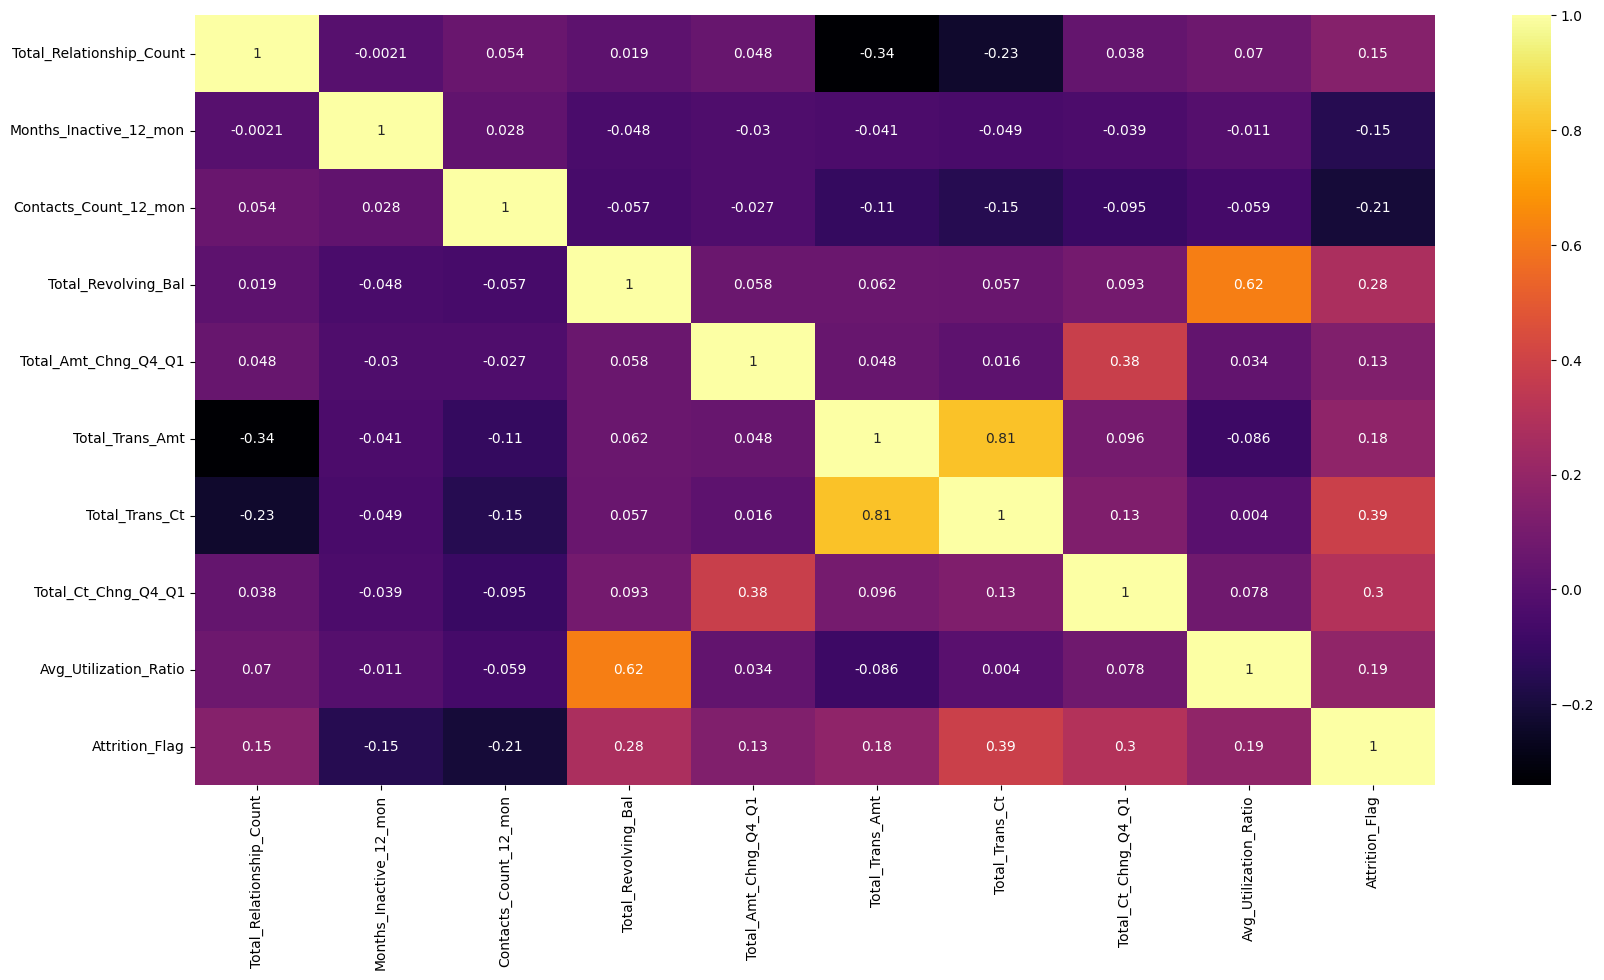

In [415]:
df_Tomek_anova = pd.concat([df_Tomek_anova, y_up], axis=1)
checkCorrFF(df_Tomek_anova)

In [416]:
df_Tomek_anova.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Attrition_Flag'],
      dtype='object')

## **Model Training**

In [417]:
#get the dummy variables for the categorical variables
x_LE = df_Tomek_anova.drop(['Attrition_Flag'], axis = 1)
y_LE = df_Tomek_anova['Attrition_Flag']

x_LE_train,x_LE_test,y_LE_train,y_LE_test = train_test_split(x_LE, y_LE, test_size = 0.2, random_state = 0)

clf_LE = LogisticRegression()
clf_LE.fit(x_LE_train,y_LE_train)
print("model score: %.8f" % clf_LE.score(x_LE_test, y_LE_test))

model score: 0.88786482


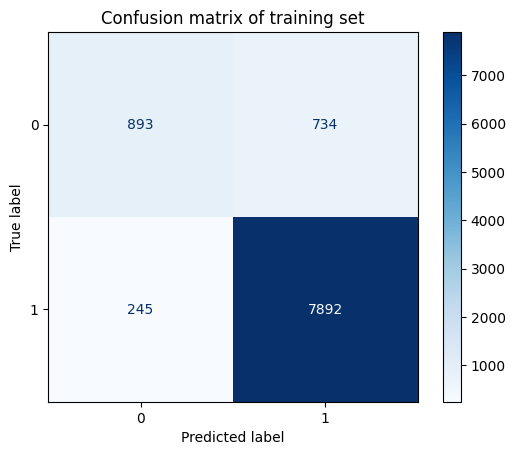

In [418]:
# Plot confusion matrix of training set
plot_confusion_matrix(clf_LE,
                      x_LE,
                      y_LE,
                      display_labels=list(set(y_LE_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [419]:
# Classification report
y_LE_pred = clf_LE.predict(x_LE_train)
print("Classification report \n=======================")
print(classification_report(y_true=y_LE_train, y_pred=y_LE_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_LE_train, y_pred=y_LE_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.79      0.55      0.65      1277
           1       0.92      0.97      0.94      6534

    accuracy                           0.90      7811
   macro avg       0.85      0.76      0.80      7811
weighted avg       0.90      0.90      0.90      7811

Confusion matrix 
[[ 701  576]
 [ 184 6350]]


In [420]:
# Classification report
y_LE_pred = clf_LE.predict(x_LE_test)
print("Classification report \n=======================")
print(classification_report(y_true=y_LE_test, y_pred=y_LE_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_LE_test, y_pred=y_LE_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       350
           1       0.91      0.96      0.93      1603

    accuracy                           0.89      1953
   macro avg       0.83      0.76      0.79      1953
weighted avg       0.88      0.89      0.88      1953

Confusion matrix 
[[ 192  158]
 [  61 1542]]


### **Drop High Correlation between classes**

In [421]:
df_Tomek_anova.drop(['Avg_Utilization_Ratio', 'Total_Trans_Amt'], axis=1, inplace=True)

## **Model Training** (After Dropping)

In [422]:
#get the dummy variables for the categorical variables
x_LE = df_Tomek_anova.drop(['Attrition_Flag'], axis = 1)
y_LE = df_Tomek_anova['Attrition_Flag']

x_LE_train,x_LE_test,y_LE_train,y_LE_test = train_test_split(x_LE, y_LE, test_size = 0.2, random_state = 0)

clf_LE = LogisticRegression()
clf_LE.fit(x_LE_train,y_LE_train)
print("model score: %.8f" % clf_LE.score(x_LE_test, y_LE_test))

model score: 0.88376856


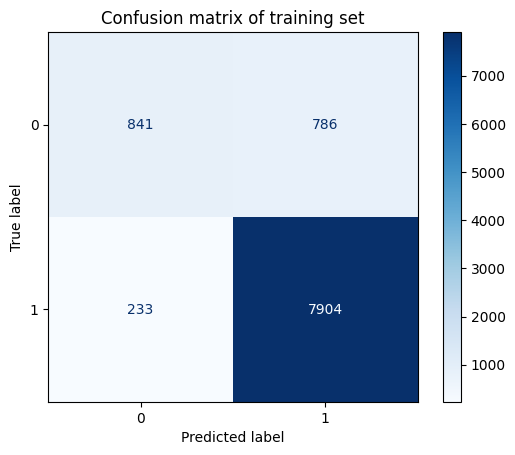

In [423]:
# Plot confusion matrix of training set
plot_confusion_matrix(clf_LE,
                      x_LE,
                      y_LE,
                      display_labels=list(set(y_LE_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

### **Predict using Train Data**

In [424]:
# Classification report
y_LE_pred = clf_LE.predict(x_LE_train)
print("Classification report \n=======================")
print(classification_report(y_true=y_LE_train, y_pred=y_LE_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_LE_train, y_pred=y_LE_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      1277
           1       0.91      0.97      0.94      6534

    accuracy                           0.90      7811
   macro avg       0.85      0.75      0.78      7811
weighted avg       0.89      0.90      0.89      7811

Confusion matrix 
[[ 664  613]
 [ 179 6355]]


### **Predict using Test Data**

In [425]:
# Classification report
y_LE_pred = clf_LE.predict(x_LE_test)
print("Classification report \n=======================")
print(classification_report(y_true=y_LE_test, y_pred=y_LE_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_LE_test, y_pred=y_LE_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       350
           1       0.90      0.97      0.93      1603

    accuracy                           0.88      1953
   macro avg       0.83      0.74      0.77      1953
weighted avg       0.88      0.88      0.87      1953

Confusion matrix 
[[ 177  173]
 [  54 1549]]


## **Conclusion**

Comparing no resampling to T-Link, we can conclude that 'this dataset' <u>is not fit for using T-Link method</u> to resample data. This is because, according to <a href='https://www.analyticsvidhya.com/blog/2020/11/handling-imbalanced-data-machine-learning-computer-vision-and-nlp/'>this website</a>, T-link is basically a pair of data points from different classes (nearest-neighbors). The objective is to drop the sample that corresponds to the
majority and thereby minimalizing the count of the dominating label. However, as you can see from the graphs below, this dataset contains a lot of data with low variance between class.

<Figure size 1000x800 with 0 Axes>

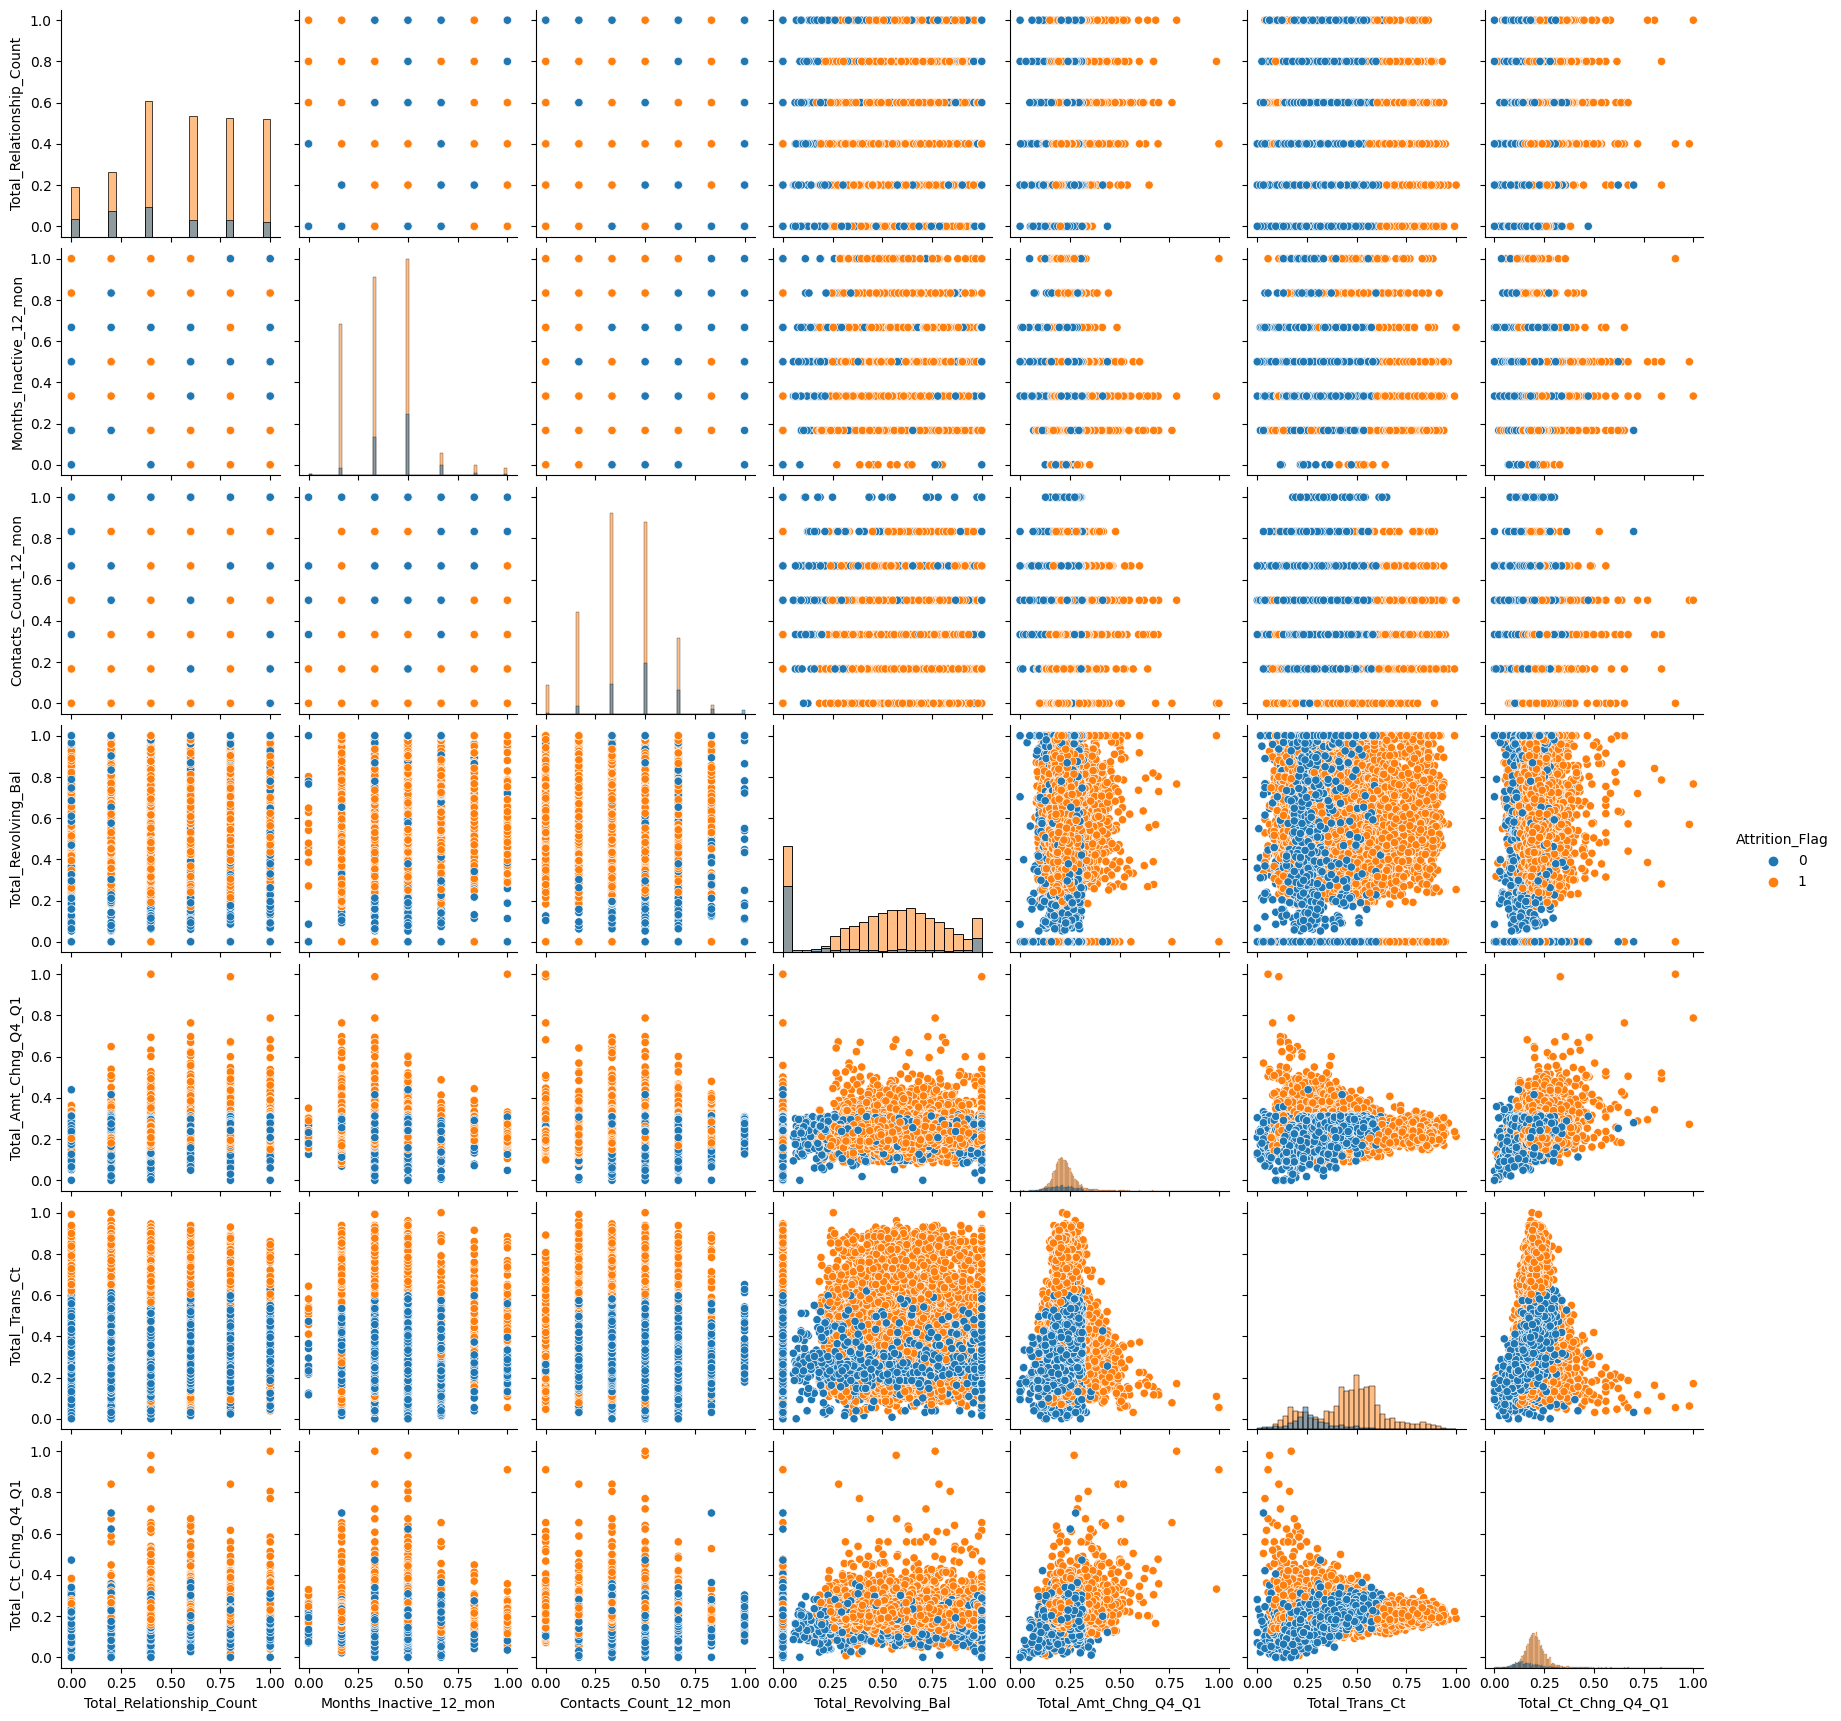

In [426]:
# Plot variance explained by each component
plt.figure(figsize=(10, 8))
sns.pairplot(df_Tomek_anova, hue='Attrition_Flag', diag_kind="hist")